In [17]:
import pandas as pd
from sklearn.metrics import roc_curve
from sklearn.ensemble import IsolationForest
from sklearn import svm
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
#our system
df_our = pd.read_csv("tpr,fpr_our.csv", index_col = 0)

our_tpr = df_our["tpr"].values.tolist()
our_fpr = df_our["fpr"].values.tolist()

In [5]:
#autoencoder
df_ae = pd.read_csv("tpr,fpr_ae.csv", index_col = 0)

ae_tpr = df_ae["tpr"].values.tolist()
ae_fpr = df_ae["fpr"].values.tolist()

In [6]:
#pca
df_pca = pd.read_csv("tpr,fpr_pca.csv", index_col = 0)

pca_tpr = df_pca["tpr"].values.tolist()
pca_fpr = df_pca["fpr"].values.tolist()

In [15]:
#isolation forest
csv_wmi = pd.read_csv("normal_wmi.csv", index_col = 0)
csv_wmi = csv_wmi.drop(["Name"], axis = 1)

scaler = MinMaxScaler()
scaled_wmi = scaler.fit_transform(csv_wmi.to_numpy())

isol10 = IsolationForest(contamination = 0.005, max_samples=100, random_state = 0)
isol10.fit(scaled_wmi)

y_pred = isol10.predict(test_wmi)
if_fpr, if_tpr, thresholds_if = roc_curve(y,y_pred)

In [14]:
#one class svm
total_wmi = pd.read_csv("wmi_total.csv", index_col = 0)
csv_wmi = total_wmi.drop(["malicious"], axis = 1)

y = total_wmi['malicious'].values
y = pd.DataFrame(y, columns = ["label"])

scaler = MinMaxScaler()
test_wmi = scaler.fit_transform(csv_wmi.to_numpy())

svm10 = svm.OneClassSVM(nu = 0.002, kernel = "rbf", gamma = 'scale')
svm10.fit(scaled_wmi)

y_pred_svm = svm10.predict(test_wmi)
svm_fpr, svm_tpr, thresholds_svm = roc_curve(y,y_pred_svm)

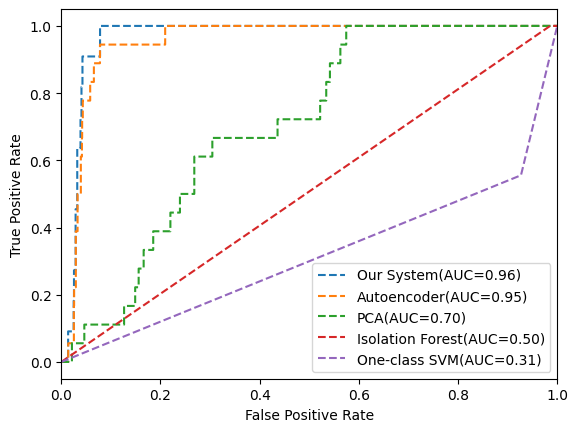

In [18]:
#roc curve
plt.plot(our_fpr, our_tpr, '--', label='Our System(AUC=0.96)')
plt.plot(ae_fpr, ae_tpr, '--', label='Autoencoder(AUC=0.95)')
plt.plot(pca_fpr, pca_tpr, '--',label='PCA(AUC=0.70)')
plt.plot(if_fpr, if_tpr, '--', label='Isolation Forest(AUC=0.50)')
plt.plot(svm_fpr, svm_tpr, '--',label='One-class SVM(AUC=0.31)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim(0, 1)

plt.legend()
plt.show()